In [ ]:
# !pip install tsplib95

In [1]:
# Required Libraries
import pandas as pd
import numpy as np
import random
import copy
from matplotlib import pyplot as plt 
import tsplib95


# Fonction Longueur de la tournée
def distance_calc(Xdata, city_tour):
    distance = 0
    for k in range(0, len(city_tour[0])-1):
        m = k + 1
        distance = distance + Xdata[city_tour[0][k]-1, city_tour[0][m]-1]            
    return distance

# Fonction: Distance Euclidienne
def euclidean_distance(x, y):       
    distance = 0
    for j in range(0, len(x)):
        distance = (x[j] - y[j])**2 + distance   
    return distance**(1/2) 

# Fonction: Sol initiale
def seed_function(Xdata):
    seed = [[],float("inf")]
    sequence = random.sample(list(range(1,Xdata.shape[0]+1)), Xdata.shape[0])
    sequence.append(sequence[0])
    seed[0] = sequence
    seed[1] = distance_calc(Xdata, seed)
    return seed

# Fonction: Stochastic 2_opt
def stochastic_2_opt(Xdata, city_tour):
    best_route = copy.deepcopy(city_tour)      
    i, j  = random.sample(range(0, len(city_tour[0])-1), 2)
    if (i > j):
        i, j = j, i
    best_route[0][i:j+1] = list(reversed(best_route[0][i:j+1]))           
    best_route[0][-1]  = best_route[0][0]              
    best_route[1] = distance_calc(Xdata, best_route)                     
    return best_route

# Fonction: Local Search
def local_search(Xdata, city_tour, max_attempts = 50, neighbourhood_size = 5):
    count = 0
    solution = copy.deepcopy(city_tour) 
    while (count < max_attempts): 
        for i in range(0, neighbourhood_size):
            candidate = stochastic_2_opt(Xdata, city_tour = solution)
        if candidate[1] < solution[1]:
            solution  = copy.deepcopy(candidate)
            count = 0
        else:
            count = count + 1                             
    return solution 

# Fonction: Variable Neighborhood Search
def variable_neighborhood_search(Xdata, city_tour, max_attempts = 20, neighbourhood_size = 5, iterations = 50):
    count = 0
    solution = copy.deepcopy(city_tour)
    best_solution = copy.deepcopy(city_tour)
    while (count < iterations):
        for i in range(0, neighbourhood_size):
            for j in range(0, neighbourhood_size):
                solution = stochastic_2_opt(Xdata, city_tour = best_solution)
            solution = local_search(Xdata, city_tour = solution, max_attempts = max_attempts, neighbourhood_size = neighbourhood_size )
            if (solution[1] < best_solution[1]):
                best_solution = copy.deepcopy(solution) 
                break
        count = count + 1
        print("Iteration = ", count, "-> Distance ", best_solution[1])
    return best_solution

# Fonction: Plot Tour
def plot_tour(coordinates, tour):
    # Extract x and y coordinates from the list
    x = [coordinates[i-1][0] for i in tour]
    y = [coordinates[i-1][1] for i in tour]

    # Add the starting point at the end to complete the tour
    x.append(x[0])
    y.append(y[0])

    # Plot the tour
    plt.plot(x, y, marker='o', linestyle='-')
    plt.scatter(x, y, color='red')  # highlight points
    plt.title('TSP Tour Visualization')
    plt.xlabel('X Coordinate')
    plt.ylabel('Y Coordinate')
    plt.grid(True)
    plt.show()


Iteration =  1 -> Distance  18476.0
Iteration =  2 -> Distance  16788.0
Iteration =  3 -> Distance  15413.0
Iteration =  4 -> Distance  14664.0
Iteration =  5 -> Distance  14664.0
Iteration =  6 -> Distance  14111.0
Iteration =  7 -> Distance  14111.0
Iteration =  8 -> Distance  14111.0
Iteration =  9 -> Distance  14078.0
Iteration =  10 -> Distance  14078.0
Iteration =  11 -> Distance  13549.0
Iteration =  12 -> Distance  13513.0
Iteration =  13 -> Distance  13513.0
Iteration =  14 -> Distance  12643.0
Iteration =  15 -> Distance  12524.0
Iteration =  16 -> Distance  12524.0
Iteration =  17 -> Distance  12524.0
Iteration =  18 -> Distance  11886.0
Iteration =  19 -> Distance  11886.0
Iteration =  20 -> Distance  11886.0
Iteration =  21 -> Distance  11783.0
Iteration =  22 -> Distance  11783.0
Iteration =  23 -> Distance  11783.0
Iteration =  24 -> Distance  11514.0
Iteration =  25 -> Distance  11514.0
Iteration =  26 -> Distance  11514.0
Iteration =  27 -> Distance  11412.0
Iteration 

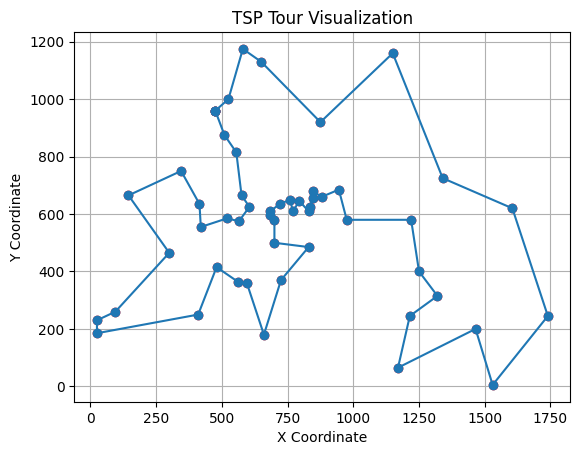

In [17]:
#remplacer le chemin par le chemin de votre fichier
data = tsplib95.load('/users/mac/Downloads/berlin52.tsp')
n = len(data.node_coords)

# construire la matrice de distance
X = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        X[i, j] = data.get_weight(i + 1, j + 1)

# generer la solution initiale
sol = seed_function(X)

# appliquer le vns sur la solution initiale
best_sol,distance = variable_neighborhood_search(X, city_tour = sol, max_attempts = 20, neighbourhood_size = 2, iterations = 12000)
print('==========================')
print("Solution = ", best_sol)
print("Distance = ", distance)

# afficher la solution
plot_tour(list(data.node_coords.values()), best_sol)